In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


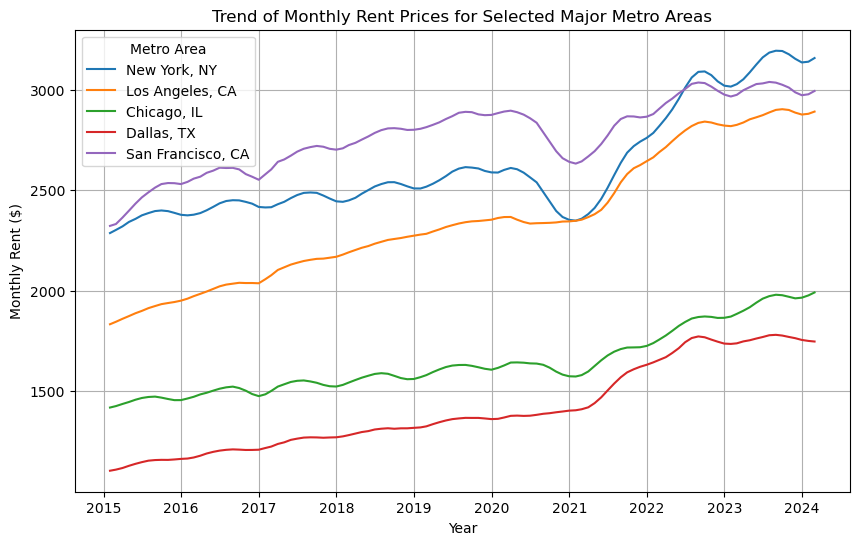

In [9]:

# Load the cleaned data
state_rentals = pd.read_csv("Cleaned Data/cleaned_state_rentals.csv")
state_rentals['Date Recorded'] = pd.to_datetime(state_rentals['Date Recorded'])

# Filtering for specific major metro areas
focus_cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX', 'San Francisco, CA']

# Filter the dataset to select
filtered_rentals = state_rentals[state_rentals['Region Name'].isin(focus_cities)]

# Plotting
plt.figure(figsize=(10, 6))
for city in focus_cities:
    city_data = filtered_rentals[filtered_rentals['Region Name'] == city]
    plt.plot(city_data['Date Recorded'], city_data['Monthly Rent'], label=city)

plt.title('Trend of Monthly Rent Prices for Selected Major Metro Areas')
plt.xlabel('Year')
plt.ylabel('Monthly Rent ($)')
plt.legend(title='Metro Area')
plt.grid(True)
plt.show()


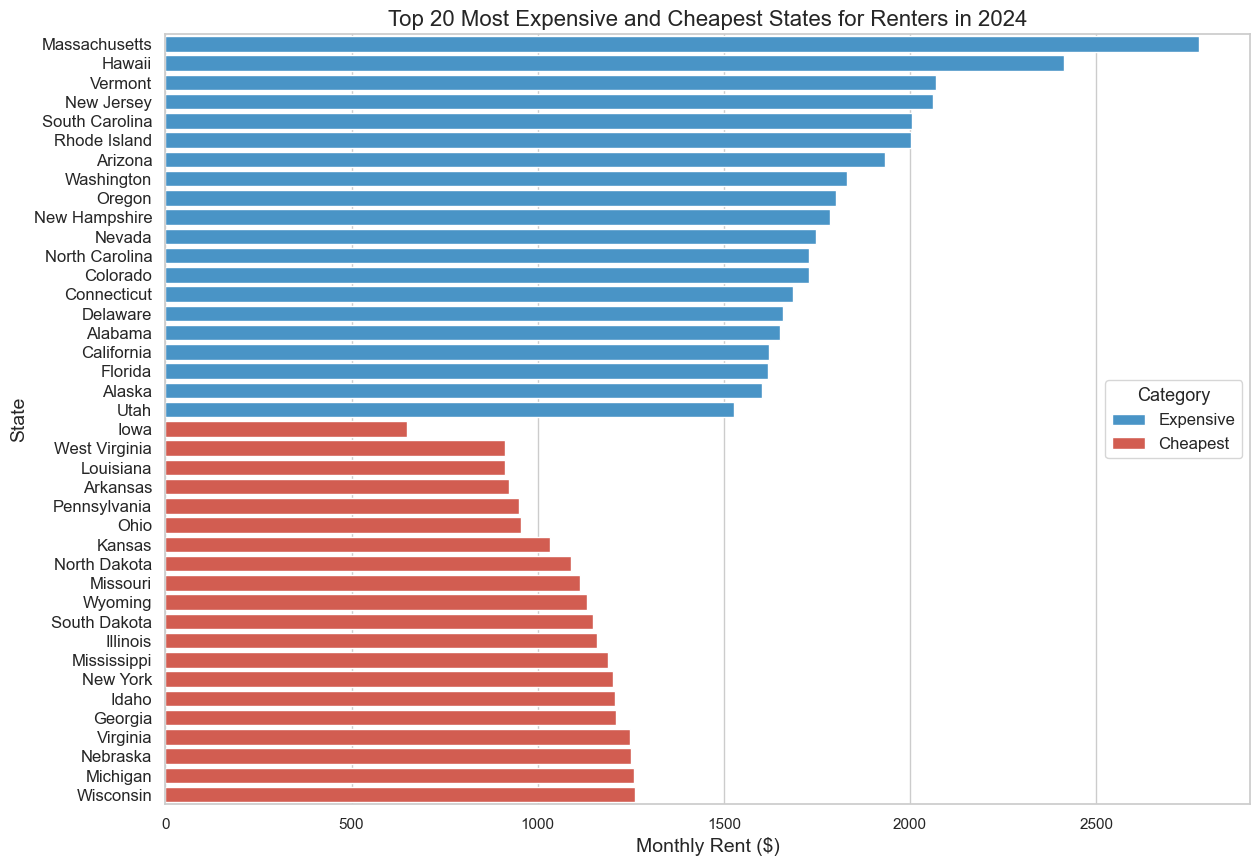

In [12]:
# Most recent data point for each state
latest_rentals = state_rentals.sort_values('Date Recorded').groupby('State Name').last()

# top 20 most expensive/cheapest
top20_expensive = latest_rentals.nlargest(20, 'Monthly Rent')
top20_cheapest = latest_rentals.nsmallest(20, 'Monthly Rent')

# Combine dataframes
combined = pd.concat([top20_expensive, top20_cheapest], keys=['Expensive', 'Cheapest'])
combined.reset_index(level=0, inplace=True)
combined.rename(columns={'level_0': 'Category'}, inplace=True)

sns.set(style="whitegrid")

#Bar plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as necessary
sns.barplot(
    x='Monthly Rent', 
    y=combined.index, 
    hue='Category', 
    data=combined, 
    palette=['#3498db', '#e74c3c'],  # Using a blue color for expensive and red for cheapest
    dodge=False  # Bars won't be dodged
)

plt.title('Top 20 Most Expensive and Cheapest States for Renters in 2024', fontsize=16)
plt.xlabel('Monthly Rent ($)', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.legend(title='Category', title_fontsize='13', fontsize='12')

# Enhance the readability of the y-axis labels
plt.yticks(fontsize=12)

plt.show()



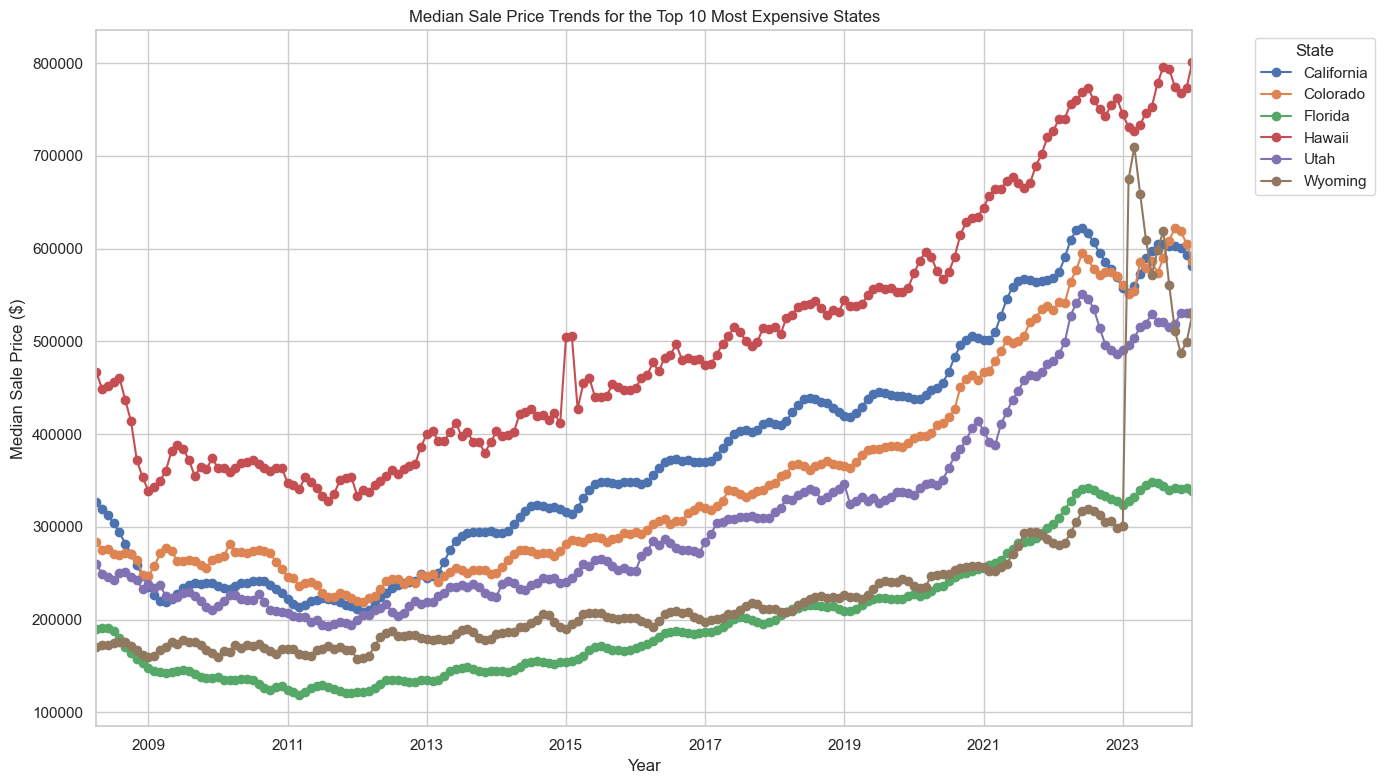

In [17]:

import pandas as pd
import matplotlib.pyplot as plt

# Load in data
state_median_sales = pd.read_csv("Cleaned Data/cleaned_median_sales.csv")
state_median_sales['Date Recorded'] = pd.to_datetime(state_median_sales['Date Recorded'])

# Most recent date entry
latest_date = state_median_sales['Date Recorded'].max()

# Top 10 states with highest median sales
top10_states = (
    state_median_sales[state_median_sales['Date Recorded'] == latest_date]
    .nlargest(10, 'Median Sale Price')['State Name']
    .tolist()
)

# Filter for top 10
filtered_median_sales = state_median_sales[state_median_sales['State Name'].isin(top10_states)]

# Aggregate and mean in case of any duplicates
filtered_median_sales = filtered_median_sales.groupby(['State Name', 'Date Recorded'])['Median Sale Price'].mean().reset_index()

# Pivot the data
pivot_median_sales = filtered_median_sales.pivot(index='Date Recorded', columns='State Name', values='Median Sale Price')

# Plotting the trends
pivot_median_sales.plot(figsize=(14, 8), marker='o')

plt.title('Median Sale Price Trends for the Top 10 Most Expensive States')
plt.xlabel('Year')
plt.ylabel('Median Sale Price ($)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()

